## Why can PDF values be greater than 1?

This is a common source of confusion, so here's a short explanation and a demonstration:

The basic answer is that they can be greater than 1 because when x is a continous variable, $p(x)$ doesn't give us the "probability of obtaining x", it gives us the probability **density** of obtaining x.

What is the difference? Since $x$ is a real number the probabilty of getting _exactly_ some value of $x$ (say, 1.32243324323423) is infinitely small (as there are infinitely many real numbers). That is why the question "what is the probability of obtaining x" isn't very well defined or meaningful.

What is meaningful is to ask "what is the probability that I'll draw a number in some interval, say $x_0$ to $x_1$?". And this is where our PDF comes in and gives the answer -- the probability of obtaining a value between $x_0$ to $x_1$ is the integral of the probability density over that interval:

$$ \int_{x_0}^{x_1} p(x) dx $$

and it is this value that is always $\le 1$.

When can $p(x)$ on its own be greater than 1?

When the interval in $x$ over which it's greater than 1 is relatively short (so the "area under the curve" that the above integral describes ends up being less than 1).

Here's an example of a very narrow Gaussian which peaks around ~8. But note that the peak is over a very short interval, so the area under the curve (which is the probability) is always lower than 1.

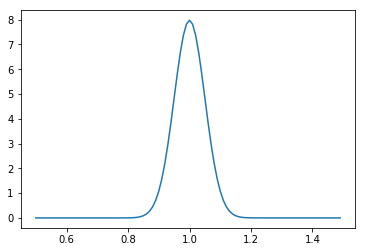

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.arange(0.5, 1.5, 0.01)
p = norm(1, 0.05).pdf
plt.plot(x, p(x))

Let's demonstrate this by calculating the probability of obtaining a number between 0.9 and 1.1. That's just the integral of p(x) from 0.9 to 1.1. I'll evaluate it numerically by approximating it with a [Riemann sum](https://en.wikipedia.org/wiki/Riemann_sum):

In [11]:
dx = 0.001
x = np.arange(0.9, 1.1, dx)
np.sum(p(x)*dx)

0.9555723566863658

As promised, the probability is less than 1.

A faster and more accurate way to compute this is using the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function), the CDF:

In [12]:
c = norm(1, 0.05).cdf
c(1.1) - c(0.9)

0.9544997361036417

and also see the lecture notes for more details on the CDF.

Bottom line: why can the PDF $p(x)$ be greater than 1? Because it's not probability -- it's *probability density*. The probability is given by the area under your PDF which is always $\le 1$.